In [76]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

<h1> СЛУ </h1>

<h2> Итерационные методы </h2>

<h3> Классификация </h3>

Пусть дана СЛАУ
$$
A x=b
$$
Для того, чтобы воспользоваться методом простой итерации, необходимо привести её к виду $x=B x+g$. Представим матрицу $A$ в виде $A=M-N$, где $M-$ обратима. Тогда система приводится к виду $x=B x+g$ следующим образом:
$$
\begin{aligned}
& (M-N) x=b \\
& M x=N x+b \\
& x=M^{-1} N x+M^{-1} b
\end{aligned}
$$
Матрицы $M$ и $N$ могут быть выбраны различными способами; в зависимости от конкретного способа получаются различные разновидности метода. Обозначим далее за $L$ - строго нижнюю треугольную часть $A$, за $D$ - диагональную часть $A$, за $U$ - строго верхнюю треугольную часть $A$. Получающиеся таким способом разновидности эквиваленты следующим методам:
- $M=\frac{1}{\omega} E$ - метод Ричардсона;
- $M=D$ - метод Якоби;
- $M=\frac{1}{\omega} D$ - взвешенный метод Якоби;
- $M=D+L$ - метод Гаусса - Зейделя;
- $M=\frac{1}{\omega} D+L$ - метод релаксации;
- $M(\omega)=\frac{\omega}{2-\omega}\left(\frac{1}{\omega} D+L\right) D^{-1}\left(\frac{1}{\omega} D+L\right)^{\top}$ - метод симметричной релаксации.

<h3> Условия сходимости </h3>

Необходимое и достаточное условие сходимости: $\rho(\alpha)<1$, где $-\rho(\alpha)$ спектральный радиус $\alpha^{[1]}$.
Достаточное условие сходимости: $\|\alpha\|<1^{[1]}$.
В частности при выборе нормы, подчинённой векторной $\|x\|_{\infty}=\max _{1 \leq i \leq n}\left|x_i\right|$ условие сходимости приобретает вид $\max _{j=1}^n\left|\alpha_{i j}\right|<1$ (где $i=1,2, \ldots, n$ ).
При выборе нормы $\|x\|_1=\sum_{i=1}^n\left|x_i\right|$ условие приобретает вид $\sum_{\substack{i=1 \\ i \neq j}}^n\left|\alpha_{i j}\right|<1$ (где $j=1,2, \ldots, n$ ), что называют условием диагонального преобладания исходной матрицы $A$.

<h3> Оценка погрешности </h3>

Пусть $x$ - вектор точного решения. Тогда можно получить следующие оценки погрешности приближённого решения $x^{(k)}$ на $k$-м шаге алгоритма ${ }^{[2]}$ :
- априорная:
$$
\left\|x-x^{(k)}\right\| \leq\|\alpha\|^k\left\|x^{(0)}\right\|+\frac{\|\alpha\|^k}{1-\|\alpha\|}\|\beta\| .
$$
- апостериорная:
$$
\left\|x-x^{(k)}\right\| \leq \frac{\|\alpha\|}{1-\|\alpha\|}\left\|x^{(k)}-x^{(k-1)}\right\| .
$$

<h3> Практика  </h3>

Порешаем методом Якоби, чтобы не обращать матрицу.

In [147]:
n = 100
b = np.random.rand(n)
A = np.random.rand(n,n) + 40 * np.diag(np.ones(n))
#la.norm(A)
L = np.zeros( (n,n) )
U = L = np.zeros( (n,n) )
# для экономии памяти лучше будем хранить D как вектор, а не матрицу
D = L = np.zeros( n )

In [148]:
# Вычислим нижнюю часть
for i in range(n):
    for j in range(i):
        U[i, j] = A[i,j]
    D[i] = A[i,i]
    
L = A - np.diag(D) - U

In [149]:
print(A, D, U, L)

[[40.07226754  0.59681808  0.38352176 ...  0.60022098  0.32185437
   0.33357719]
 [ 0.90327577 40.00165828  0.84947987 ...  0.40672323  0.62966656
   0.84206146]
 [ 0.88006674  0.16388992 40.07010911 ...  0.7261341   0.36978314
   0.7077471 ]
 ...
 [ 0.59103322  0.89026888  0.52770444 ... 40.58566954  0.36221743
   0.04427126]
 [ 0.15011203  0.6389483   0.08114004 ...  0.51255752 40.39977236
   0.72363358]
 [ 0.94348312  0.79538634  0.34125878 ...  0.88223095  0.59042535
  40.39319422]] [40.07226754 40.00165828 40.07010911 40.06699735 40.88229516 40.22380236
 40.70620112 40.72284419 40.80121083 40.88572352 40.86155481 40.34368994
 40.34484552 40.80848359 40.39171839 40.24093348 40.83787374 40.99663864
 40.78424112 40.46306307 40.83301257 40.81023152 40.39023688 40.33714652
 40.10993602 40.57861567 40.27743788 40.70071985 40.23276602 40.84298917
 40.18047702 40.57266859 40.97202725 40.92076866 40.93598652 40.36323323
 40.21275048 40.70208314 40.38631819 40.70592631 40.54135735 40.726284

In [150]:
print( (L + U) )

[[0.         0.59681808 0.38352176 ... 0.60022098 0.32185437 0.33357719]
 [0.90327577 0.         0.84947987 ... 0.40672323 0.62966656 0.84206146]
 [0.88006674 0.16388992 0.         ... 0.7261341  0.36978314 0.7077471 ]
 ...
 [0.59103322 0.89026888 0.52770444 ... 0.         0.36221743 0.04427126]
 [0.15011203 0.6389483  0.08114004 ... 0.51255752 0.         0.72363358]
 [0.94348312 0.79538634 0.34125878 ... 0.88223095 0.59042535 0.        ]]


In [151]:
print(la.norm( la.inv(np.diag(D) + L) @  U , ord = "fro") )

0.8415207711302263


In [164]:
# число итераций
m = 2000
epsilon = 0.01
# начальное приближение
x = np.random.rand(n)
r = np.zeros( (m, n) )
x_error = 0
x_prev = np.zeros( n )
x_prev_prev = np.zeros( n )

print(x)

for i in range(m):
    r[i] = np.abs(A @ x - b)
    #print(x, x_prev, x_prev_prev)
    x_prev_prev = x_prev
    x_prev = x
    x = la.inv(np.diag(D) + L) @  ( U @ x + b )
    if i > 1:
        if la.norm(x_prev - x_prev_prev) > 0:
            q = la.norm(x - x_prev) / la.norm(x_prev - x_prev_prev)
        #print(q)
        x_error = la.norm(x - x_prev) / (1 - q)

[0.92696771 0.28549408 0.86913595 0.96397793 0.7673275  0.30704079
 0.72674844 0.44906382 0.24272648 0.8863166  0.08866484 0.86399546
 0.61785547 0.53014579 0.76792954 0.2284461  0.63653823 0.80867347
 0.51606845 0.05933985 0.41825733 0.57366795 0.55266289 0.59114219
 0.50255195 0.20615361 0.51891297 0.53141454 0.88265709 0.64418029
 0.258577   0.03187434 0.53709717 0.41152554 0.16208922 0.0065475
 0.78683311 0.00266771 0.95791544 0.77918024 0.02375375 0.39038906
 0.05428626 0.22198946 0.23543849 0.61097874 0.08336457 0.59699264
 0.33892659 0.6387735  0.60994445 0.39785843 0.73228306 0.61498799
 0.80699514 0.56629232 0.04011658 0.57683752 0.36435899 0.87112751
 0.76389103 0.87633326 0.74118495 0.3699028  0.05442478 0.25893426
 0.12511772 0.81248226 0.9270739  0.74947496 0.4418251  0.21059647
 0.20776728 0.84172364 0.01234453 0.62794391 0.58877581 0.28877719
 0.51934529 0.63238644 0.69821955 0.06622977 0.89058811 0.91683282
 0.85224246 0.31571047 0.09374718 0.55014187 0.36405111 0.42597

In [165]:
print(x_error)
# ага, то есть мы с какого-то момента налетаем на чертов инвариантный вектор.. но почему-то не тот
# upd. все изменилось, как только мы поменяли Якоби на Зейделя. Мда, рил Зейдель рулит. пусть и чутка подольше
# и матрицу нужно обращать, ну да все равно..

0.0


In [163]:
print(r[-1])

[2.77555756e-17 1.18474503e-02 9.31264102e-03 1.42383639e-02
 3.48692690e-03 1.08914825e-02 4.20770174e-05 2.90251314e-02
 2.79659958e-02 4.08362348e-02 3.31045805e-02 7.76486578e-02
 2.82541943e-02 5.73734630e-02 4.98887402e-02 5.05658256e-02
 4.24796563e-02 4.95404140e-02 2.82114879e-02 5.96377626e-02
 7.16622385e-02 5.33022224e-02 2.94536330e-02 8.74045199e-02
 6.30693906e-02 5.96211657e-02 6.66160999e-02 5.60761744e-02
 7.32099618e-02 1.02859754e-01 7.22503364e-02 1.11922211e-01
 9.84959718e-02 7.21303700e-02 1.03146963e-01 7.25875197e-02
 1.51965310e-01 9.51624449e-02 1.18161404e-01 1.41033717e-01
 1.45762169e-01 1.77218271e-01 1.70906245e-01 1.62922712e-01
 1.81265034e-01 1.90422126e-01 1.20307661e-01 1.80119564e-01
 1.56414851e-01 1.71809056e-01 1.43599826e-01 1.99581381e-01
 2.17365099e-01 2.47039373e-01 2.36146573e-01 2.78642957e-01
 2.38951033e-01 2.78101002e-01 3.04477293e-01 3.02528300e-01
 3.27733818e-01 3.57404984e-01 2.78417551e-01 3.32700787e-01
 4.09063664e-01 3.734008

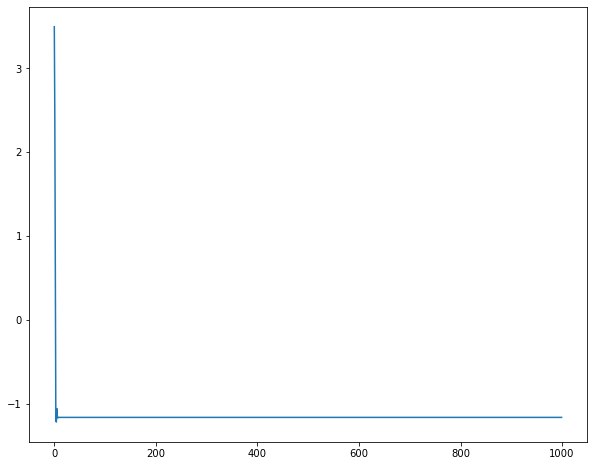

In [158]:
plt.figure( figsize=(10,8) )

plt.plot(range(m), np.log(la.norm(r, axis = 1) / la.norm(x) / n) )

plt.show()

In [169]:
la.det(A- 0.01 * np.eye(1))

4.126091634703686e+160

<h1> Спектральные задачи </h1>